In [221]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}

page = "https://www.transfermarkt.com/malaysia-super-league/startseite/wettbewerb/MYS1"
pageTree = requests.get(page, headers=headers)
pageSoup = BeautifulSoup(pageTree.content, 'html.parser')

In [223]:
TeamsList = []
TeamLinksList = []

In [224]:
Teams = pageSoup.find_all("td", {"class": "hauptlink no-border-links"})
TeamLinks = pageSoup.find_all("td", {"class": "hauptlink no-border-links"})

In [225]:
for i in range(0, len(Teams)):
    str_Teams = str(Teams[i]).split('title="',1)[1].split('">',1)[0]
    TeamsList.append(str_Teams)

In [226]:
for i in range(0, len(TeamLinks)):
    str_TeamLinks = str(TeamLinks[i]).split('a href="',1)[1].split('"',1)[0]
    TeamLinksList.append("https://www.transfermarkt.com" + str_TeamLinks)

In [227]:
df = pd.DataFrame({
                    "Team":TeamsList,
                    "Link":TeamLinksList
})

In [228]:
PlayerTeamsList = []
PlayersList = []
NumberList = []
AgeList = []
PositionList = []
NationList = []
ValueList = []

In [229]:
for x in range(0, len(TeamLinksList)):
    page = TeamLinksList[x]
    pageTree = requests.get(page, headers=headers)
    pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
    
    TeamNames = pageSoup.find_all("h1", {"class": "data-header__headline-wrapper data-header__headline-wrapper--oswald"})
    Players = pageSoup.find_all("img", {"class": "bilderrahmen-fixed lazy lazy"})
    Numbers = pageSoup.find_all("div", {"class": "rn_nummer"})
    Age = pageSoup.find_all("td", {"class": "zentriert"})
    Positions = pageSoup.find_all("table", {"class": "inline-table"})
    Nationality = pageSoup.find_all("td", {"class": "zentriert"})
    Values = pageSoup.find_all("td", {"class": "rechts hauptlink"})
    
    for i in range(0, len(Players)):
        str_Team = str(TeamNames).split('">\n            ',1)[1].split('        </h1>',1)[0]
        PlayerTeamsList.append(str_Team)
    
    for i in range(0, len(Players)):
        str_Players = str(Players[i]).split('" class',1)[0].split('<img alt="',1)[1]
        PlayersList.append(str_Players)
    
    for i in range(0, len(Numbers)):
        str_Numbers = str(Numbers[i]).split('class="rn_nummer">',1)[1].split('</div>',1)[0]
        NumberList.append(str_Numbers)
    
    for i in range(1, (len(Players)*3), 3):
        str_Age = str(Age[i]).split("(",1)[1].split(")",1)[0]
        AgeList.append(str_Age)
        
    for i in range(0, len(Positions)):
        str_Position = str(Positions[i]).split('<td>', 1)[1].split('</td>', 1)[0].split('\n ', 1)[1].split('           ', 1)[1].split('        ',1)[0]
        PositionList.append(str_Position)
    
    for i in range(2, (len(Players)*3),3):
        str_Nationality = str(Nationality[i]).split('" class',1)[0].split('<img alt="',1)[1]
        NationList.append(str_Nationality)
    
    for i in range(0, len(Values)):
        ValueList.append(Values[i].text)
        
    cleaned_values=[]

    for a in range(0, len(ValueList)):
        if 'k' in ValueList[a]:
            str_a = str(ValueList[a]).split('€')[1].split('k')[0]
            flt_a = float(str_a)*1000
            cleaned_values.append(flt_a)
        elif 'm' in ValueList[a]:
            str_a = str(ValueList[a]).split('€')[1].split('m')[0]
            flt_a = float(str_a)*1000000
            cleaned_values.append(flt_a)
        else:
            cleaned_values.append(float(a))


        
    
    
    

In [230]:
final_df = pd.DataFrame({
                         "Team":PlayerTeamsList,
                         "Player":PlayersList,
                         "Number":NumberList,
                         "Age":AgeList,
                         "Position":PositionList,
                         "Nationality":NationList,
                         "Value EUR":cleaned_values                        
                        })

In [231]:
final_df

,Team,Player,Number,Age,Position,Nationality,Value EUR
0,Johor Darul Ta'zim,Syihan Hazmi,33,28,Goalkeeper,Malaysia,300000.0
1,Johor Darul Ta'zim,Izham Tarmizi,-,32,Goalkeeper,Malaysia,100000.0
2,Johor Darul Ta'zim,Farizal Marlias,1,37,Goalkeeper,Malaysia,100000.0
3,Johor Darul Ta'zim,Haziq Nadzli,26,26,Goalkeeper,Malaysia,50000.0
4,Johor Darul Ta'zim,Jordi Amat,5,31,Centre-Back,Indonesia,800000.0
...,...,...,...,...,...,...,...
354,Kelantan United,S. Sharvin,21,23,Right Winger,Malaysia,50000.0
355,Kelantan United,Royizzat Daud,16,24,Striker,Malaysia,50000.0
356,Kelantan United,Haziq Subri,11,24,Striker,Malaysia,25000.0
357,Kelantan United,Nik Azli Nik Alias,26,27,Centre-Forward,Malaysia,25000.0


In [232]:
# Export the DataFrame to an Excel file
final_df.to_excel(r"C:\Users\izzat\OneDrive\Desktop\Sandbox\TransfermrktWebScrape\MalaysiaSuperLeague_TeamsSquadAnalysis\MSL_TeamsSquadData.xlsx", index=False)

In [239]:
# Export the DataFrame to an csv file
final_df.to_csv(r"C:\Users\izzat\OneDrive\Desktop\Sandbox\TransfermrktWebScrape\MalaysiaSuperLeague_TeamsSquadAnalysis\MSL_TeamsSquadData.csv", index=False)

In [240]:
# Load the dataset
msldata = pd.read_csv(r"C:\Users\izzat\OneDrive\Desktop\Sandbox\TransfermrktWebScrape\MalaysiaSuperLeague_TeamsSquadAnalysis\MSL_TeamsSquadData.csv")

# Display the first few rows of the dataset
print(msldata.head())


                 Team           Player Number  Age     Position Nationality  \
0  Johor Darul Ta'zim     Syihan Hazmi     33   28   Goalkeeper    Malaysia   
1  Johor Darul Ta'zim    Izham Tarmizi      -   32   Goalkeeper    Malaysia   
2  Johor Darul Ta'zim  Farizal Marlias      1   37   Goalkeeper    Malaysia   
3  Johor Darul Ta'zim     Haziq Nadzli     26   26   Goalkeeper    Malaysia   
4  Johor Darul Ta'zim       Jordi Amat      5   31  Centre-Back   Indonesia   

   Value EUR  
0   300000.0  
1   100000.0  
2   100000.0  
3    50000.0  
4   800000.0  


In [241]:
# Display column information
print(msldata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Team         359 non-null    object 
 1   Player       359 non-null    object 
 2   Number       359 non-null    object 
 3   Age          359 non-null    int64  
 4   Position     359 non-null    object 
 5   Nationality  359 non-null    object 
 6   Value EUR    359 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 19.8+ KB
None


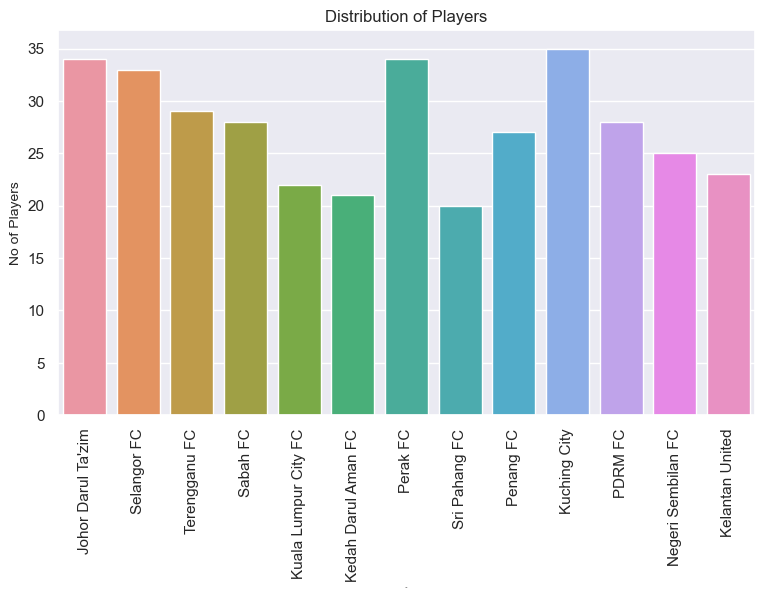

In [242]:
# Plotting the distribution of players
sns.set(style="whitegrid")
sns.set(font_scale=1.0)
plt.figure(figsize=(9, 5))
sns.countplot(data=msldata, x='Team')
plt.title('Distribution of Players')
plt.xlabel('Team', fontsize=0.1)
plt.ylabel('No of Players', fontsize=10)
# Rotate the tick labels in the second subplot
plt.xticks(rotation=90)
plt.show()

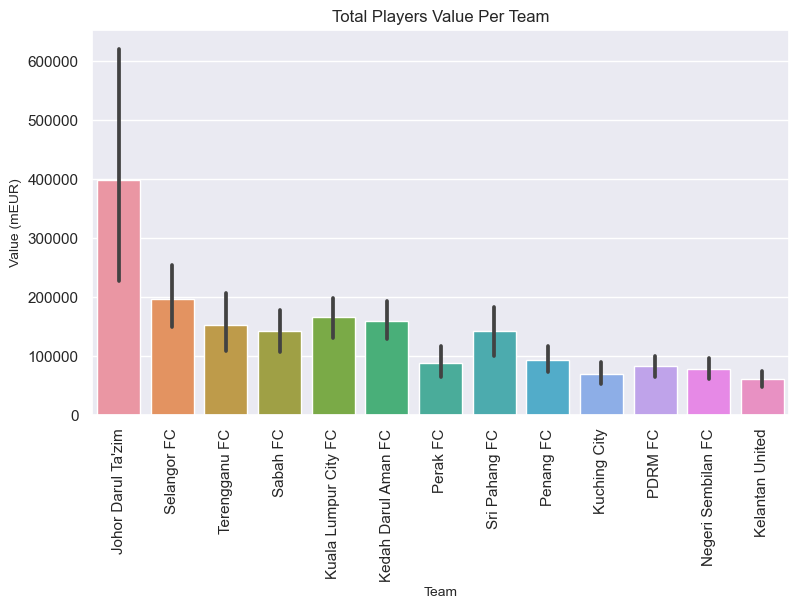

In [254]:
# Plotting Value 
sns.set(style="whitegrid")
sns.set(font_scale=1.0)
plt.figure(figsize=(9, 5))
sns.barplot(msldata, x="Team", y="Value EUR")
plt.title('Total Players Value Per Team')
plt.xlabel('Team', fontsize=10)
plt.ylabel('Value (mEUR)', fontsize=10)
# Rotate the tick labels in the second subplot
plt.xticks(rotation=90)
plt.show()

In [243]:
# Display Top 10 Most Expensive Players in MSL 24/25 Season
Top10Value = msldata.nlargest(n=20, columns=['Value EUR'])

# Display Top 10 Least Expensive Players in MSL 24/25 Season
Bottom10Value = msldata.nsmallest(n=20, columns=['Value EUR'])

In [244]:
Top10Value

,Team,Player,Number,Age,Position,Nationality,Value EUR
15,Johor Darul Ta'zim,Jalil Elías,-,27,Defensive Midfield,Syria,3000000.0
22,Johor Darul Ta'zim,Chico Geraldes,-,28,Attacking Midfield,Portugal,2500000.0
4,Johor Darul Ta'zim,Jordi Amat,5,31,Centre-Back,Indonesia,800000.0
39,Selangor FC,Umar Eshmurodov,92,31,Centre-Back,Uzbekistan,700000.0
83,Terengganu FC,Nurillo Tukhtasinov,97,27,Attacking Midfield,Uzbekistan,700000.0
29,Johor Darul Ta'zim,Arif Aiman,42,21,Right Winger,Malaysia,550000.0
8,Johor Darul Ta'zim,Murilo,-,28,Left-Back,Brazil,500000.0
53,Selangor FC,Noor Al-Rawabdeh,8,26,Central Midfield,Jordan,500000.0
27,Johor Darul Ta'zim,Óscar Arribas,24,25,Left Winger,Philippines,450000.0
33,Johor Darul Ta'zim,Bérgson,9,33,Centre-Forward,Brazil,450000.0


In [245]:
Bottom10Value

,Team,Player,Number,Age,Position,Nationality,Value EUR
45,Selangor FC,Aiman Hakimi,-,19,Centre-Back,Malaysia,45.0
211,Sri Pahang FC,Nasyrullah Zaki,-,22,Midfielder,Malaysia,211.0
335,Negeri Sembilan FC,Amirul Hakimi Rosli,-,21,Centre-Forward,Malaysia,335.0
114,Sabah FC,Sahrizan Saidin,69,25,Attacking Midfield,Malaysia,10000.0
123,Sabah FC,Rahman Shah,23,27,Striker,Malaysia,10000.0
171,Perak FC,Oswyn Lim,66,19,Defender,Malaysia,10000.0
250,Kuching City,Andy Nicholas Nipen,1,26,Goalkeeper,Malaysia,10000.0
278,Kuching City,Alauddin Farid Atan,43,23,Right Winger,Malaysia,10000.0
318,Negeri Sembilan FC,Harith Samsuri,-,23,Centre-Back,Malaysia,10000.0
328,Negeri Sembilan FC,Afiq Fitri,-,21,Central Midfield,Malaysia,10000.0


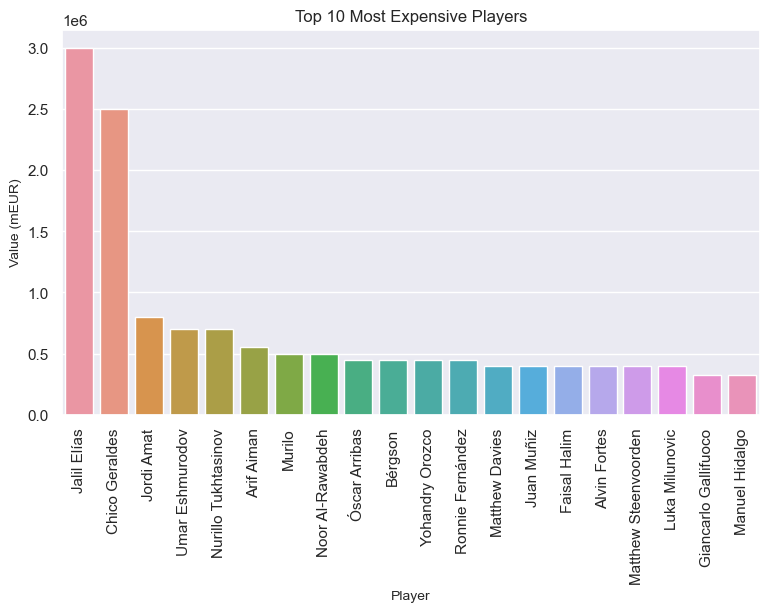

In [250]:
# Plotting Value 
sns.set(style="whitegrid")
sns.set(font_scale=1.0)
plt.figure(figsize=(9, 5))
sns.barplot(Top10Value, x="Player", y="Value EUR")
plt.title('Top 10 Most Expensive Players')
plt.xlabel('Player', fontsize=10)
plt.ylabel('Value (mEUR)', fontsize=10)
# Rotate the tick labels in the second subplot
plt.xticks(rotation=90)
plt.show()

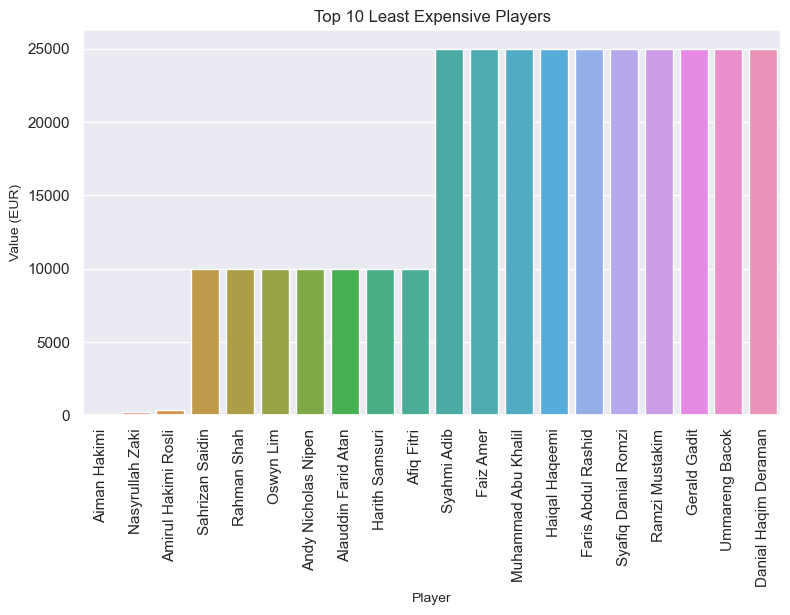

In [252]:
# Plotting Top 10 Least Expensive Players in MSL 24/25 Season
sns.set(style="whitegrid")
sns.set(font_scale=1.0)
plt.figure(figsize=(9, 5))
sns.barplot(Bottom10Value, x="Player", y="Value EUR")
plt.title('Top 10 Least Expensive Players')
plt.xlabel('Player', fontsize=10)
plt.ylabel('Value (EUR)', fontsize=10)
# Rotate the tick labels in the second subplot
plt.xticks(rotation=90)
plt.show()